In [1]:
import pandas as pd
import numpy as np
import pytesseract
from pytesseract import Output
import PIL.Image
import cv2
import re

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/61I9XdN6OF...,748919,item_weight,500.0 gram
1,https://m.media-amazon.com/images/I/71gSRbyXmo...,916768,item_volume,1.0 cup
2,https://m.media-amazon.com/images/I/61BZ4zrjZX...,459516,item_weight,0.709 gram
3,https://m.media-amazon.com/images/I/612mrlqiI4...,459516,item_weight,0.709 gram
4,https://m.media-amazon.com/images/I/617Tl40LOX...,731432,item_weight,1400 milligram


In [ ]:
df['entity_name'] == width

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263859 entries, 0 to 263858
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   image_link    263859 non-null  object
 1   group_id      263859 non-null  int64 
 2   entity_name   263859 non-null  object
 3   entity_value  263859 non-null  object
dtypes: int64(1), object(3)
memory usage: 8.1+ MB


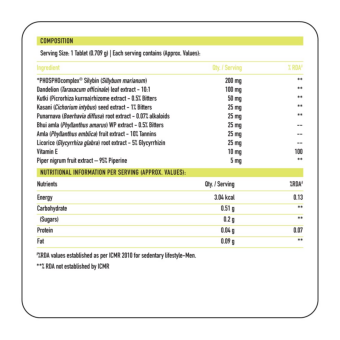

In [5]:
from skimage import io
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

f = df['image_link'][2]
a = io.imread(f)

plt.imshow(a)
plt.axis('off')

plt.show()

In [15]:
import pytesseract
from skimage import io
from PIL import Image

# Your config for Tesseract
myconfig = r"--psm 11 --oem 1"

# Image link (replace with your actual URL)
image_url = df['image_link'][5]

# Download and read the image using skimage
img = io.imread(image_url)

# Use pytesseract to extract text
text = pytesseract.image_to_string(img, config=myconfig)

#print(text)

# entity_unit_map as provided
'''entity_unit_map = {
    'width': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'},
    'depth': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'},
    'height': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'},
    'item_weight': {'gram', 'kilogram', 'microgram', 'milligram', 'ounce', 'pound', 'ton'},
    'maximum_weight_recommendation': {'gram', 'kilogram', 'microgram', 'milligram', 'ounce', 'pound', 'ton'},
    'voltage': {'kilovolt', 'millivolt', 'volt'},
    'wattage': {'kilowatt', 'watt'},
    'item_volume': {'centilitre', 'cubic foot', 'cubic inch', 'cup', 'decilitre', 'fluid ounce', 'gallon', 'imperial gallon', 'litre', 'microlitre', 'millilitre', 'pint', 'quart'}
}'''

# Create regex patterns for all units
unit_pattern = r"\b(\d+(?:\.\d+)?\s*(?:cm|inch|mm|g|kg|mg|oz|lb|volt|watt|ml|l))\b"


# Search the text for any units that match the pattern
matches = re.findall(unit_pattern, text.lower())


# Display the matched units
print("Matched units:", matches)


Matched units: ['1400mg']


In [16]:
# Function to map extracted units to the corresponding attribute
def map_to_entity(entity_unit_map, matches):
    entity_values = {}
    
    for match in matches:
        # Split the match into value and unit
        value, unit = re.match(r"(\d+(?:\.\d+)?)\s*(\w+)", match).groups()
        value = float(value)
        
        # Find the corresponding entity attribute
        for entity, units in entity_unit_map.items():
            if any(unit in unit_name for unit_name in units):
                entity_values[entity] = value
                break
                
    return entity_values

# Get the mapped values
mapped_values = map_to_entity(entity_unit_map, matches)
print("Mapped entity values:", mapped_values)


Mapped entity values: {}


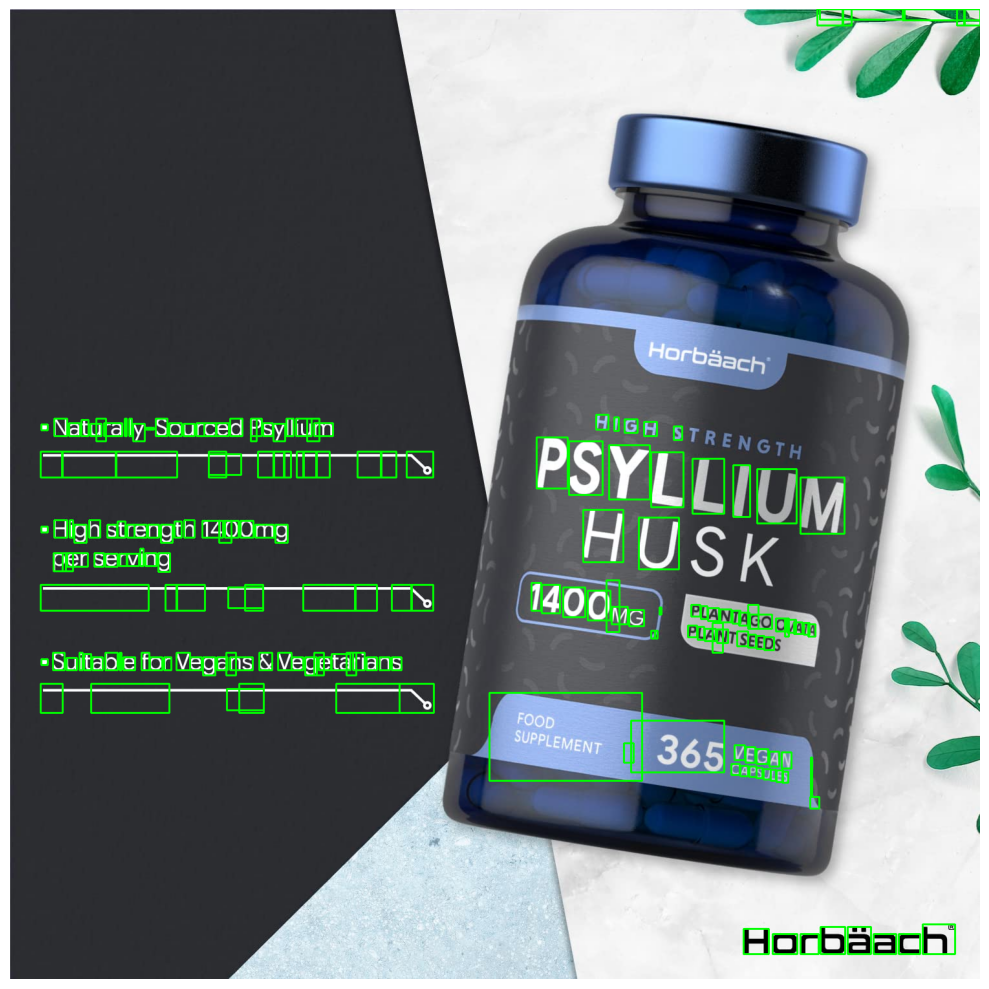

In [8]:
height, width, channels = img.shape
boxes = pytesseract.image_to_boxes(img, config=myconfig)

for box in boxes.splitlines():
    box = box.split(' ')
    img = cv2.rectangle(img, (int(box[1]),height - int(box[2])), (int(box[3]),height - int(box[4])),(0,255,0),2)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plotting the image in the notebook using matplotlib
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis for a cleaner look
plt.show()